In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

In [2]:
data = pd.read_excel("fruit.xlsx")
print("Dataset Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None

Descriptive Statistics:
           diameter        weight           red         green          blue
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       9.975685    175.050792    153.847800     76.010600     11.363200
std        1.947844     29.212119     10.432954     11.708433      9.061275
min        2.960000     86.760000    115.000000     31.000000      2.000000
25%        8.460000    152.220000    147.000000     68.000000      2.000000
50%        9.9800

# PREPOCESSING DATA

In [3]:
X = data[['diameter', 'weight', 'red', 'green', 'blue']].values
le = LabelEncoder() #MENGUBAH STRING JADI NUMERIK
y = le.fit_transform(data['name']) #MELATIH ENCODER DATA LALU MENGONVERSINY LANGSUNG
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% PENGUJIAN 80%PELATIHAN #MENENTUKAN NILAI ACAK UTK MEMASTIKAN DTA KONSISTEN TIAP DIRUN

In [4]:
scaler = StandardScaler() #SENSITIF TERHADAP SKALA FITUR (HASIL LEBIH BAIK &OPTIMAL, HASIL PREDIKSI LEBIH AKURAT)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
scaler_file = 'scaler_svm.pkl'
with open(scaler_file, 'wb') as f:
    pickle.dump(scaler, f)

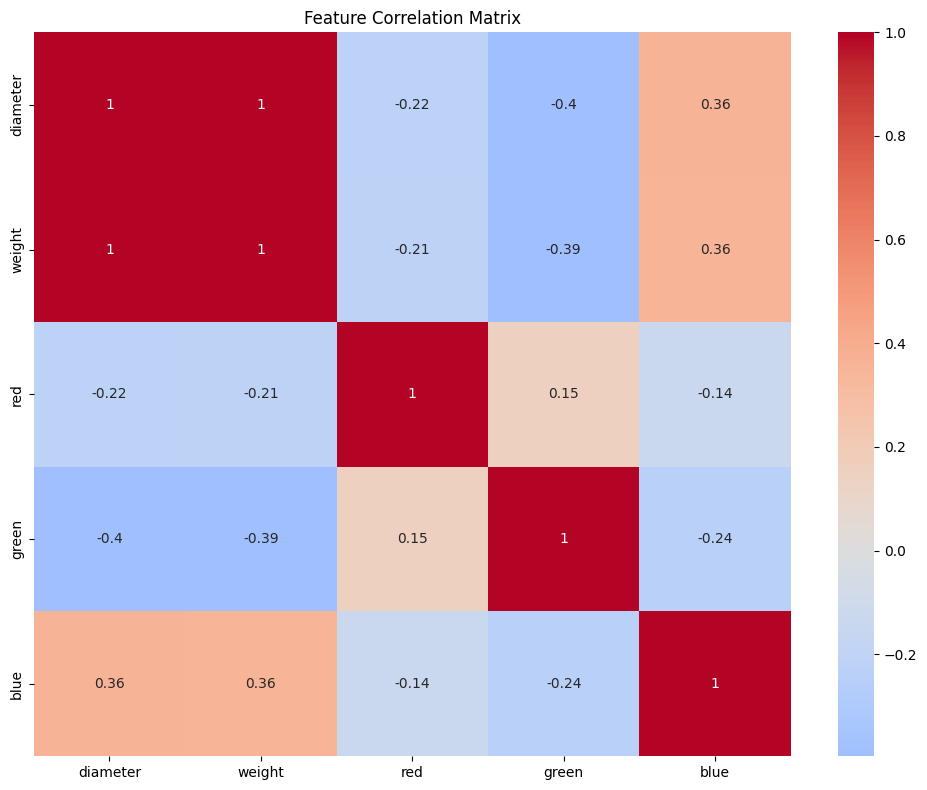

In [6]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['diameter', 'weight', 'red', 'green', 'blue']].corr() #MENGHITUNG MATRIK KORELASI
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [7]:
svm = SVC(kernel='linear', random_state=42) #RANDOM STATE, MEMASTIKAN HASIL KOSISTEN)
svm.fit(X_train_scaled, y_train) #MELATIH MODEL DENGAN DATA LATIH
svm_predictions = svm.predict(X_test_scaled) #MELAKUKAN PREDIKSI DENGAN DATA UJI
svm_accuracy = accuracy_score(y_test, svm_predictions) #HITUNG AKURASI MODEL DGN BANDINGKAN PREDIKSI DGN DATA UJI SEBENARNYA

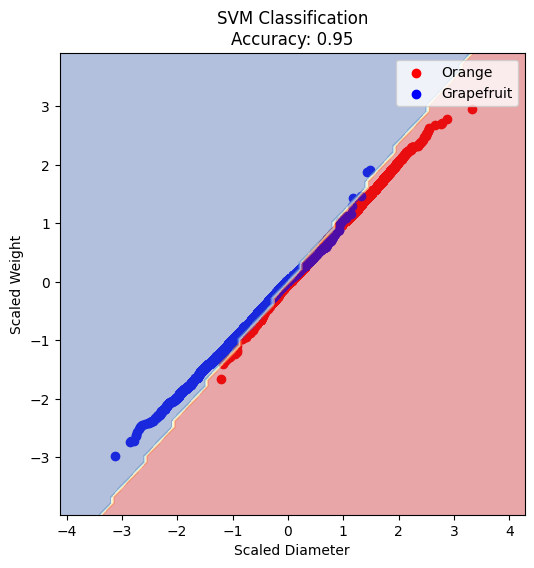

In [8]:
# Plot untuk SVM
plt.figure(figsize=(6, 6))

# Plot training points - menggunakan data training yang sudah discaling
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], 
            color='red', label='Orange')
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], 
            color='blue', label='Grapefruit')

# Create mesh grid berdasarkan data training yang sudah discaling
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions for mesh points
mesh_predictions = svm.predict(np.c_[xx.ravel(), yy.ravel(),
                                     np.zeros_like(xx.ravel()),
                                     np.zeros_like(xx.ravel()),
                                     np.zeros_like(xx.ravel())])
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.4, cmap='RdYlBu')
plt.title(f'SVM Classification\nAccuracy: {svm_accuracy:.2f}')
plt.xlabel('Scaled Diameter')
plt.ylabel('Scaled Weight')
plt.legend()

plt.show()


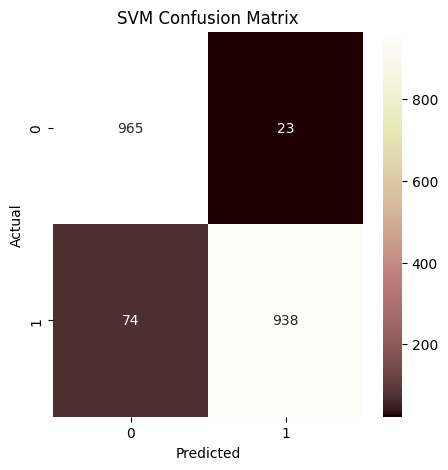

In [9]:
plt.figure(figsize=(5, 5))
cm = confusion_matrix(y_test, svm_predictions) #Menghitung confusion matrix antara y_test (nilai sebenarnya) dan svm_predictions (hasil prediksi SVM)
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.title('SVM Confusion Matrix') #MENGUKUR KINERJA MODEL KLASIFIKASI
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
feature_names = ['diameter', 'weight', 'red', 'green', 'blue']

# SVM Feature Importance #CEK MODEL SVM PUNYA ATRIBUT COEF, UTK MENENTUKAN APAKAH MODEL SVM TLH DILATIH & DPT MEMBERI KOEFIS
if hasattr(svm, 'coef_'):
    svm_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': np.abs(svm.coef_[0]) ## Kolom 'Importance' berisi nilai absolut dari koefisien SVM.
    }).sort_values('Importance', ascending=False) # Mengurutkan berdasarkan pentingnya fitur.
    print("\nSVM Feature Importance:")
    print(svm_importance)


SVM Feature Importance:
    Feature  Importance
0  diameter   13.986807
1    weight   11.909409
3     green    0.542461
4      blue    0.440191
2       red    0.267205


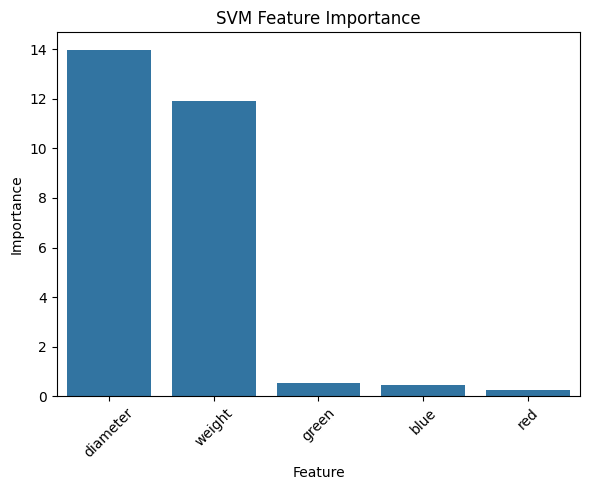

In [11]:
if hasattr(svm, 'coef_'):  # Memeriksa apakah objek svm memiliki atribut 'coef_' (biasanya dimiliki oleh model SVM).
    plt.figure(figsize=(6, 5))
    sns.barplot(data=svm_importance, x='Feature', y='Importance')
    plt.title('SVM Feature Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions, target_names=['Orange', 'Grapefruit']))


SVM Classification Report:
              precision    recall  f1-score   support

      Orange       0.93      0.98      0.95       988
  Grapefruit       0.98      0.93      0.95      1012

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [13]:
pickle.dump(svm, open('svmfruit.pkl', 'wb')) #BINARY WRITE